#Stochastic Gradient Descent
In this exercise, we want to implement [Stochastic Gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) without using a built-in optimizer, to understand how parameters are optimized at the low level.

Let's consider a toy problem of [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). The data generation process is such that we have one floating point variable $x \in [0,1]$, and one categorical variable $y\in \{0,1\}$. The Logistic Regression problem is to find the optimal parameters for the logistic function to predict the probability of $y$ given $x$.

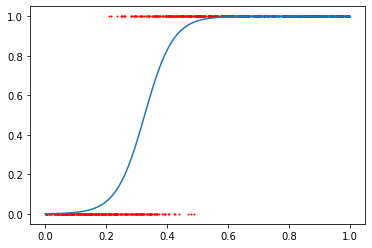

In the image above, the x and y axis correspond to the variables defined previously, with the red "dots" the true data as generated by the process defined below, and the blue line is the optimal logistic decision function learned from the data.

The optimal parameters can be found numerically using gradient descent. In this case, we will be using SGD (batched gradient descent) to optimize the two parameters in the logistic function, $\beta_1, \beta_2$.

If ${p(x)={\frac {1}{1+e^{-(\beta _{1}+\beta _{2}x)}}}}$, then we want to find $\beta_1, \beta_2$ such that the [negative log likelihood](https://en.wikipedia.org/wiki/Likelihood_function) is minimized. In this case, ${\ell =\sum _{k=1}^{K}\left(\,y_{k}\ln(p_{k})+(1-y_{k})\ln(1-p_{k})\right)}$, and the SGD formula is simply:
$\beta_i = \beta_{i-1} - \alpha * \nabla \ell$.

The data generation process as well as the pseudo-code is provided for you below, your task is to fill in the appropriate pytorch code. *Do not use the built-in optimizer*, implement SGD using tensor operations alone.


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
  data = torch.rand(1000, 2)
  label = ((data[:,0]+0.3*data[:,1]) > 0.5).to(torch.int)
  return data[:,0], label

epoch 0 loss: 18.421527862548828
epoch 1 loss: 15.93217658996582
epoch 2 loss: 14.328195571899414
epoch 3 loss: 13.096397399902344
epoch 4 loss: 12.132732391357422
epoch 5 loss: 11.364020347595215
epoch 6 loss: 10.73939323425293
epoch 7 loss: 10.223258018493652
epoch 8 loss: 9.790336608886719
epoch 9 loss: 9.422364234924316
epoch 10 loss: 9.105910301208496
epoch 11 loss: 8.830938339233398
epoch 12 loss: 8.58980655670166
epoch 13 loss: 8.376625061035156
epoch 14 loss: 8.186776161193848
epoch 15 loss: 8.016606330871582
epoch 16 loss: 7.863177299499512
epoch 17 loss: 7.7241106033325195
epoch 18 loss: 7.597458839416504
epoch 19 loss: 7.481607437133789
epoch 20 loss: 7.375216007232666
epoch 21 loss: 7.27715539932251
epoch 22 loss: 7.186469554901123
epoch 23 loss: 7.102344512939453
epoch 24 loss: 7.024084568023682
epoch 25 loss: 6.951091289520264
epoch 26 loss: 6.88284158706665
epoch 27 loss: 6.818880558013916
epoch 28 loss: 6.75881290435791
epoch 29 loss: 6.702286720275879
epoch 30 loss: 6.

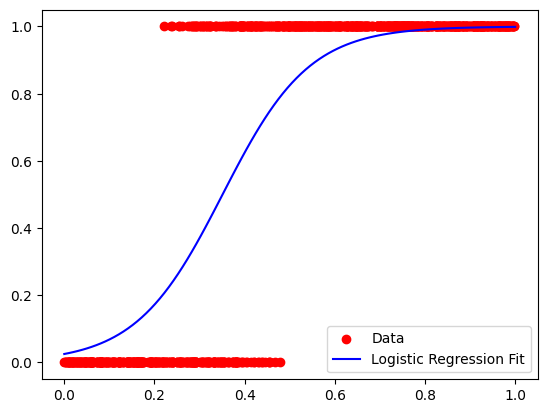

In [ ]:
input, label = generate_data()

inputs = torch.split(input, 32)
labels = torch.split(label, 32)

b1 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)
b2 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)

alpha = 0.01

for epoch in range(45):
  epoch_loss = 0
  for x, y in zip(inputs,labels):
    p_x = 1 / (1 + torch.exp(-(b1 + b2 * x)))
    loss = -torch.sum(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x))
    loss.backward()
    with torch.no_grad():
      b1 -= alpha * b1.grad
      b2 -= alpha * b2.grad
    b1.grad.zero_()
    b2.grad.zero_()

    epoch_loss += loss

  print(f'epoch {epoch} loss: {epoch_loss / len(inputs)}')
x_range = torch.linspace(0, 1, 100)
y_pred = 1 / (1 + torch.exp(-(b1 + b2 * x_range)))

plt.scatter(input.detach().numpy(), label.detach().numpy(), color='red', label='Data')
plt.plot(x_range.detach().numpy(), y_pred.detach().numpy(), color='blue', label='Logistic Regression Fit')
plt.legend()
plt.show()